Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
COLLABORATORS = "Saloni Jain, Carly Kiang"

## To receive credit for this assignment, you must also fill out the [AI Use survey](https://forms.gle/ZhR5k8TdAeN8rj4CA)


---

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


YOUR ANSWER HERE

## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

Modeling disease pandemics is important to see how diseases spread and how we can predict the spread of new diseases. They reveal how the number of susceptible, exposed, infected, and removed individuals change over time. These models can help reveal strategies for containing the spread of a disease and potentially preventing unnecessary deaths. 



### References

YOUR ANSWER HERE

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




One computational method for investigating the spread of diseases is the SEIR model, which divides the population into different categories and relates them using a system of ordinary differential equations.

“S”: People who are susceptible to the disease

“E”: People who are exposed to the disease

“I” : People who are infected with the disease

“R”: People who are immune to the disease or passed away; removed from the system

The SEIR model assumes that individuals can follow the path $ S \rightarrow E \rightarrow I \rightarrow R$ across different states. 

In addition to looking into the SEIR model, will explore complementary machine learning models that can help with outbreak predictions. Our choice of datasets includes 1. the Covid-19 dataset from John Hopkins University (https://www.kaggle.com/datasets/brendaso/2019-coronavirus-dataset-01212020-01262020) and 2. [OTHER DATASET]. The performance of linear regression models and neural network models will be used to predict the number of confirmed cases given other information, such as the date, location, and corresponding number of suspected cases, recovered cases, and deaths.





**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [6]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Implementation [50 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

### SEIR model
The SEIR model can be described by the following 4 equations:
$$
\begin{align*}
\frac{dS}{dt} &= -\beta S \frac{I}{N}, \\
\frac{dE}{dt} &= \beta S \frac{I}{N} - \sigma E, \\
\frac{dI}{dt} &= \sigma E - \gamma I, \\
\frac{dR}{dt} &= \gamma I.
\end{align*}
$$

Similarly to the SIR model, the symbols $S,E,I,R$ represent the total number of individuals that are at each state, given a point in time $t$. The SEIR model is also a closed model; if the size of the entire population is $N$, then for any point in time $t$, we have:

$$S(t) + E(t) + I(t) + R(t) = N$$

If we want to do the same rescaling where $s = S/N$ (the proportion of individuals that are susceptible) and $R_0 = \beta / \gamma$ (the basic reproduction number), we get the following four equations:
$$
\begin{align}
\frac{ds}{dt} &= -\gamma R_0\, s\, i, \\
\frac{de}{dt} &= \gamma R_0\, s\, i - \sigma e, \\
\frac{di}{dt} &= \sigma e - \gamma i, \\
\frac{dr}{dt} &= \gamma i.
\end{align}
$$

(Source: https://julia.quantecon.org/continuous_time/seir_model.html, HW5)

The basic reproduction number $R_0$ represents how contagious a disease is at the start of an outbreak, when the number of people who are immune is 0. This can also be understood by how many secondary infections are caused by one infected indivdual.

The parameter $\sigma$ represents the incubation rate, which is the rate at which exposed individuals will become infectious. This is the inverse of the average incubation period, which is the time it takes for an individual in the exposed state to transition to the infected state. In other words, we can understand $\sigma$ to be the transition $E \rightarrow I$.

$$\sigma = \frac{1}{\text{incubation period}}$$

The parameter $\gamma$ represents the recovery rate, which is the rate at which infected individuals recover. This is the inverse of the infectious period. Similarly, we can understand $\gamma$ to be the transition $I \rightarrow R$.

$$\gamma = \frac{1}{\text{infectious period}}$$

This system of rescaled equations can be written as a vector ODE

$$\frac{d\mathbf{u}}{dt} = \mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma)\quad \mathbf{u}(0)=\mathbf{u}_0
$$

where

$$
    \mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma) = 
    \begin{bmatrix} 
    -\gamma R_0\, s\, i\\
     \gamma R_0\, s\, i - \sigma e \\ 
     \sigma e - \gamma i \\ 
     \gamma i \\ 
     \end{bmatrix}, \quad \mathbf{u}(t) = \begin{bmatrix} 
   s(t)\\
    e(t) \\ 
    i(t) \\ 
    r(t)\\ 
\end{bmatrix}
$$


Using this system of rescaled equations, we can write a function that will return the RHS of the scaled dynamical system $\mathbf{F}(t,\mathbf{u}, \gamma, R_0, \sigma)$.


In [7]:
def F(t, u, gamma, R_0, sigma):
    """ RHS of scaled SEIR model of Kermack and McKendrick
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, i, r ] values such that sum(u) = 1 
            (and s,i, r are fractions of the total population N)
        s_star: float
            scaled critical susceptible population = \beta/(\alpha N)
            
    returns:
        F(u): numpy array
    """
    # YOUR CODE HERE
    s, e, i, r = u
    return numpy.array([-gamma*R_0*s*i, 
                        gamma*R_0*s*i - sigma*e, 
                        sigma*e - gamma*i,
                        gamma*i])


In [3]:
# TESTING CELL
# @TODO

As an example, we can show how the function F can be used with solve_ivp to create a plot showing the evolution of $s(t)$, $i(t)$, ${r}(t)$ over time $t\in[0, 50]$:

Peak infection at t = 47.247, i = 0.163290


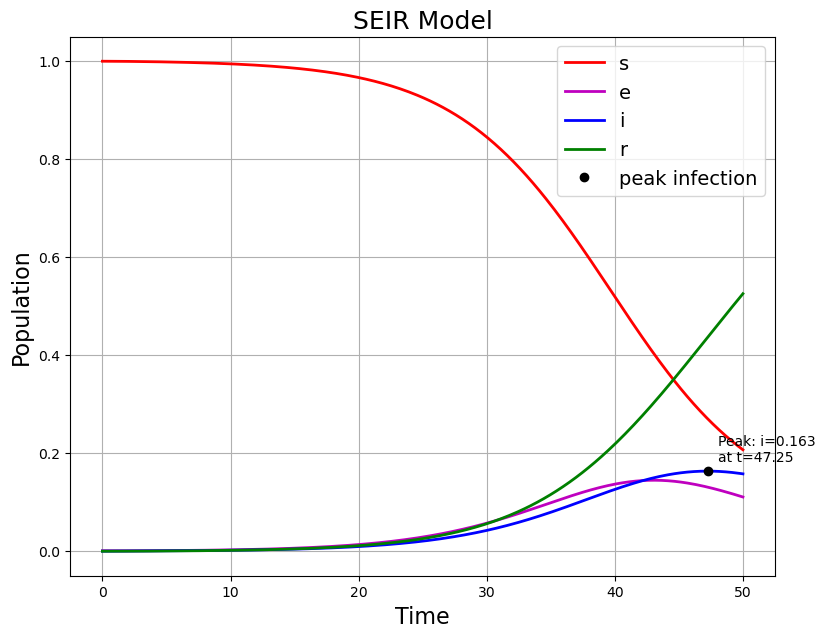

In [8]:
# Event: infection peak (di/dt = 0 ↔ σe - γi = 0)
def infection_peak(t, u, gamma, R_0, sigma):
    s, e, i, r = u
    return sigma*e - gamma*i

infection_peak.terminal = False
infection_peak.direction = -1    # detect downward crossing (peak)

# Parameters
gamma = 1/5
R_0 = 3.0
sigma = 1/4

# Initial conditions
e_0 = 1e-3
i_0 = 1e-4
s_0 = 1 - e_0 - i_0
u_0 = [s_0, e_0, i_0, 0.0]

t_max = 50

# Solve
sol = solve_ivp(
    F, [0, t_max], u_0,
    args=(gamma, R_0, sigma),
    rtol=1e-6, atol=1e-9,
    dense_output=True,
    events=infection_peak
)


# Plot
t = numpy.linspace(0, t_max, 300)
z = sol.sol(t)

fig = plt.figure(figsize=(20,7))
axes = fig.add_subplot(1,2,1)

axes.plot(t, z[0], 'r', linewidth=2, label='s')
axes.plot(t, z[1], 'm', linewidth=2, label='e')
axes.plot(t, z[2], 'b', linewidth=2, label='i')
axes.plot(t, z[3], 'g', linewidth=2, label='r')

# Extract peak
if len(sol.t_events[0]) == 0:
    print("No peak detected.")
else:
    t_peak = sol.t_events[0][0]
    i_peak = sol.sol(t_peak)[2]
    print(f"Peak infection at t = {t_peak:.3f}, i = {i_peak:.6f}")

    axes.plot(t_peak, i_peak, 'ko', label='peak infection')
    axes.annotate(f'Peak: i={i_peak:.3f}\nat t={t_peak:.2f}',
                  xy=(t_peak, i_peak), xytext=(t_peak+0.8, i_peak+0.02))
    
axes.set_xlabel("Time", fontsize=16)
axes.set_ylabel("Population", fontsize=16)
axes.set_title("SEIR Model", fontsize=18)
axes.grid()
axes.legend(fontsize=14)

plt.show()

### SEIR Model: Experimenting With Parameter Impacts
One way we can use the SEIR model to explore disease spread is seeing how different values for parameters $R_0, \sigma, \gamma$ impact the model.

### SEIR Model: Examining Policy Changes

### Machine learning methods
The dataset we are using is the 2019 Coronavirus dataset (January - February)
Our goal is to train a regression model that can predict continuous outcomes.

The dataset includes the following columns: 
1. Province/State
2. Country
3. Date last updated
4. Confirmed
5. Suspected
6. Recovered
7. Deaths

Given this data, we want to predict the number of confirmed cases to forecast future trends in the disease. This forecasted information would be helpful for understand what resources are needed to support possible patients. 


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re

# 1. Load dataset
file_path = "2019_nC0v_20200121_20200126 - SUMMARY.csv"
df = pd.read_csv(file_path)

print("==========Data before cleaning==========")
print(df.head())
print("")
# 2. Basic cleaning / parsing

# Handling NaN
df['Confirmed'] = df['Confirmed'].fillna(-1)
df['Suspected'] = df['Suspected'].fillna(-1)
df['Recovered'] = df['Recovered'].fillna(-1)
df['Deaths'] = df['Deaths'].fillna(-1)
df['Province/State'] = df['Province/State'].fillna("Unknown")

# Handling Strings -> Ints using factorize
df['Province/State'], province_mapping = pd.factorize(df['Province/State'])
df['Country'], province_mapping = pd.factorize(df['Country'])

# Convert date column to datetime # format = %m/%d/%Y %H:%M'

def clean_date(x):
    # 1. Extract only the MM/DD/YY or MM/DD/YYYY portion
    match = re.search(r'(\d+/\d+/\d+)', x)
    if not match:
        return None  # or raise an error
    date_str = match.group(1)
    
    # 2. Fix 2-digit years (your rule: always 2020)
    parts = date_str.split('/')
    if len(parts[2]) == 2:      # e.g., "20"
        parts[2] = '2020'
    
    # 3. Return unified format: M/D/YYYY
    return f"{int(parts[0])}/{int(parts[1])}/{parts[2]}"

df['Date last updated'] = df['Date last updated'].astype(str).apply(clean_date)
df['Date last updated'] = pd.to_datetime(df['Date last updated'], format="%m/%d/%Y")

# # Sort by date (important for forecasting)
df = df.sort_values(by="Date last updated")

print("==========Data after cleaning==========")
print(df.head())
print("")

==========Data before cleaning==========
  Province/State         Country Date last updated  Confirmed  Suspected  \
0       Shanghai  Mainland China         1/21/2020        9.0       10.0   
1         Yunnan  Mainland China         1/21/2020        1.0        NaN   
2        Beijing  Mainland China         1/21/2020       10.0        NaN   
3         Taiwan  Mainland China         1/21/2020        1.0        NaN   
4          Jilin  Mainland China         1/21/2020        NaN        1.0   

   Recovered  Deaths  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  

==========Data after cleaning==========
    Province/State  Country Date last updated  Confirmed  Suspected  \
0                0        0        2020-01-21        9.0       10.0   
26              24        4        2020-01-21        1.0       -1.0   
25              23        3        2020-01-21        1.0       -1.0   
24              23        2        2020

In [14]:
# 3. Create simple numeric features for forecasting
# Convert date to an ordinal number (days since 1970)
df['date_ordinal'] = df['Date last updated'].map(pd.Timestamp.toordinal)

# Optionally encode categorical variables (province/state, country)
df = pd.get_dummies(df, columns=['Province/State', 'Country'], drop_first=True)

# 4. Define features (X) and target (y)
X = df.drop(columns=['Confirmed', 'Date last updated'])
y = df['Confirmed']


# 5. Split into train → validation → test
# First split: Train/Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, shuffle=False  # no shuffle because time-series
)

# Second split: Validation/Test (each 15% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, shuffle=False
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


# 6. Feature engineering; Scaling numeric features
scaler = StandardScaler()
numeric_cols = ['Suspected', 'Recovered', 'Deaths', 'date_ordinal']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data ready for modeling!")

Train size: 257
Validation size: 55
Test size: 56
Data ready for modeling!


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# 2. Evaluate on validation set
y_pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print("Validation MSE:", mse)
print("Validation R²:", r2)


# 3. Evaluate on test set
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test R²:", r2_test)


Validation MSE: 412.30020710622114
Validation R²: 0.9556256431697231
Test MSE: 8.270236834631215e+25
Test R²: -2.88386421897588e+21


In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 7. Build a neural network regressor
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),   # 3 hidden layers
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=5000,
    random_state=42
)

# 8. Train the model
print("Training neural network...")
model.fit(X_train, y_train)

# 9. Evaluate on validation set
val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print("\n===== Validation Results =====")
print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)

# 10. Evaluate on test set
test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\n===== Test Results =====")
print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Training neural network...

===== Validation Results =====
Validation MSE: 320.2544954161876
Validation R²: 0.9655321850167371

===== Test Results =====
Test MSE: 458.89808033853933
Test R²: 0.983998042855274


## Discussion [15 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


YOUR ANSWER HERE